In [1]:
# import modules

import fsps
import numpy as np
from astropy.table import Table

import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stixsans'
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.serif'] = 'STIXGeneral'


In [2]:
# define paths

path_spectra = '/Users/sandrotacchella/ASTRO/JWST/Proposal_GO_Cycle1/spec_vs_phot/data/'


In [3]:
# load basic sp model
# IMF Chabrier
# solar metallicity
# Calzetti et al. (2000) attenuation curve
# change things: sp.params["dust2"] = 0.1

sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, imf_type=1, add_neb_emission=True,
                              sfh=3, logzsol=0.0, dust_type=2, dust2=0.0)


In [4]:
def delayed_tau(t, tau):
    print np.trapz(t*np.exp(-t/tau))
    return(t*np.exp(-t/tau)/np.trapz(t*np.exp(-t/tau)))
           

0.9991670831651444
24.5653747243237
80.08425634524046
369.3627299483104


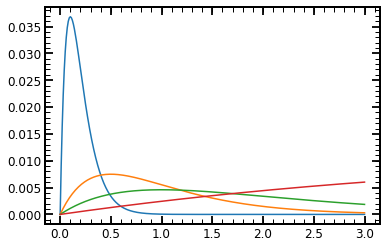

In [5]:
time = np.arange(0.00, 3.01, 0.01)
plt.plot(time, delayed_tau(time, 0.1), '-')
plt.plot(time, delayed_tau(time, 0.5), '-')
plt.plot(time, delayed_tau(time, 1.0), '-')
plt.plot(time, delayed_tau(time, 10.0), '-')

plt.show()


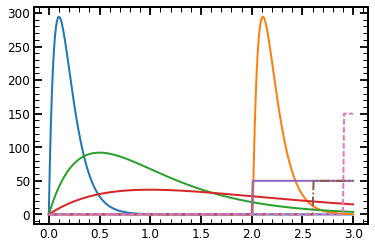

In [6]:
# set up constant SFHs

t_bulge = np.arange(0.00, 3.01, 0.01)
SFR_bulge1 = 8000*t_bulge*np.exp(-t_bulge/0.1)
SFR_bulge2 = np.zeros(len(t_bulge))
SFR_bulge2[t_bulge>2.0] = 8000*t_bulge[t_bulge<1.0]*np.exp(-t_bulge/0.1)[t_bulge<1.0]
SFR_bulge3 = 500*t_bulge*np.exp(-t_bulge/0.5)

t_disk = np.arange(0.00, 3.01, 0.01)
SFR_disk = 100*t_bulge*np.exp(-t_bulge/1.0)

t_clump = np.arange(0.00, 3.01, 0.01)
SFR_clump1 = np.zeros(len(t_clump))
SFR_clump1[t_clump>2.0] = 50.0*np.ones(np.sum(t_clump>2.0))
SFR_clump2 = np.zeros(len(t_clump))
SFR_clump2[t_clump>2.6] = 50.0*np.ones(np.sum(t_clump>2.6))
SFR_clump3 = np.zeros(len(t_clump))
SFR_clump3[t_clump>2.9] = 150.0*np.ones(np.sum(t_clump>2.9))

plt.plot(t_bulge, SFR_bulge1, '-', lw=2)
plt.plot(t_bulge, SFR_bulge2, '-', lw=2)
plt.plot(t_bulge, SFR_bulge3, '-', lw=2)
plt.plot(t_disk, SFR_disk, '-', lw=2)
plt.plot(t_clump, SFR_clump1, '-', lw=2)
plt.plot(t_clump, SFR_clump2, '-.', lw=2)
plt.plot(t_clump, SFR_clump3, '--', lw=2)
plt.show()


In [7]:
# mass made

print np.log10(np.trapz(SFR_bulge1, 10**9*t_bulge))
print np.log10(np.trapz(SFR_bulge2, 10**9*t_bulge))
print np.log10(np.trapz(SFR_bulge3, 10**9*t_bulge))
print np.log10(np.trapz(SFR_disk, 10**9*t_disk))
print np.log10(np.trapz(SFR_clump1, 10**9*t_clump))
print np.log10(np.trapz(SFR_clump2, 10**9*t_clump))
print np.log10(np.trapz(SFR_clump3, 10**9*t_clump))



10.902728105076982
10.902490162779163
11.089293397657858
10.903547147115214
10.696793085081744
10.29556709996248
10.153814864344529


In [8]:
sp.set_tabular_sfh(t_bulge, SFR_bulge1, Z=None)
sp.params["logzsol"] = 0.0
sp.params["dust2"] = 0.1
sp.params["sigma_smooth"] = 200.0
wave, spec_bulge1 = sp.get_spectrum(tage=3.0)
sp.params["zred"] = 2.241
mag_bulge1 = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])

sp.set_tabular_sfh(t_bulge, SFR_bulge2, Z=None)
sp.params["logzsol"] = 0.0
sp.params["dust2"] = 0.1
sp.params["sigma_smooth"] = 200.0
wave, spec_bulge2 = sp.get_spectrum(tage=3.0)
mag_bulge2 = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])

sp.set_tabular_sfh(t_bulge, SFR_bulge3, Z=None)
sp.params["logzsol"] = 0.0
sp.params["dust2"] = 0.1
sp.params["sigma_smooth"] = 200.0
wave, spec_bulge3 = sp.get_spectrum(tage=3.0)
mag_bulge3 = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])

sp.set_tabular_sfh(t_disk, SFR_disk, Z=None)
sp.params["logzsol"] = -0.5
sp.params["dust2"] = 0.6
sp.params["sigma_smooth"] = 150.0
wave, spec_disk = sp.get_spectrum(tage=3.0)
mag_disk = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])

sp.set_tabular_sfh(t_clump, SFR_clump1, Z=None)
sp.params["logzsol"] = -0.7
sp.params["dust2"] = 0.2
sp.params["sigma_smooth"] = 50.0
wave, spec_clump1 = sp.get_spectrum(tage=3.0)
mag_clump1 = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])
sp.set_tabular_sfh(t_clump, SFR_clump2, Z=None)
wave, spec_clump2 = sp.get_spectrum(tage=3.0)
mag_clump2 = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])
sp.set_tabular_sfh(t_clump, SFR_clump3, Z=None)
wave, spec_clump3 = sp.get_spectrum(tage=3.0)
mag_clump3 = sp.get_mags(tage=3.0, bands=['wfc3_uvis_f438w', 'wfc_acs_f814w', 'wfc3_ir_f110w', 'wfc3_ir_f160w'])


0.0

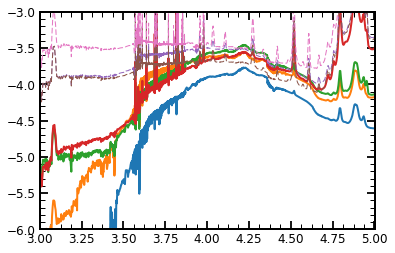

In [9]:
plt.plot(np.log10(wave), np.log10(spec_bulge1), '-', lw=2)
plt.plot(np.log10(wave), np.log10(spec_bulge2), '-', lw=2)
plt.plot(np.log10(wave), np.log10(spec_bulge3), '-', lw=2)
plt.plot(np.log10(wave), np.log10(spec_disk), '-', lw=2)
plt.plot(np.log10(wave), np.log10(spec_clump1), '--', lw=1)
plt.plot(np.log10(wave), np.log10(spec_clump2), '--', lw=1)
plt.plot(np.log10(wave), np.log10(spec_clump3), '--', lw=1)
plt.xlim([3, 5])
plt.ylim([-6, -3])
plt.show()


In [10]:
# cut to JWST NIRSpec IFU
wavelength_range = [2990, 5832]

idx = (wave >= wavelength_range[0]) & (wave <= wavelength_range[1])

wave_IFU = wave[idx]
spec_bulge1_IFU = spec_bulge1[idx]
spec_bulge2_IFU = spec_bulge2[idx]
spec_bulge3_IFU = spec_bulge3[idx]
spec_disk_IFU = spec_disk[idx]
spec_clump1_IFU = spec_clump1[idx]
spec_clump2_IFU = spec_clump2[idx]
spec_clump3_IFU = spec_clump3[idx]

# cut and resample to JWST NIRSpec IFU

# rest-frame
#dlam = 0.08
#wavelength_range = [2990, 5832]

# wavelength grid for resampling
#wave_IFU = np.arange(wavelength_range[0], wavelength_range[1], dlam)

#spec_bulge1_IFU = np.interp(wave_IFU, wave, spec_bulge1)
#spec_bulge2_IFU = np.interp(wave_IFU, wave, spec_bulge2)
#spec_bulge3_IFU = np.interp(wave_IFU, wave, spec_bulge3)
#spec_disk_IFU = np.interp(wave_IFU, wave, spec_disk)
#spec_clump1_IFU = np.interp(wave_IFU, wave, spec_clump1)
#spec_clump2_IFU = np.interp(wave_IFU, wave, spec_clump2)
#spec_clump3_IFU = np.interp(wave_IFU, wave, spec_clump3)


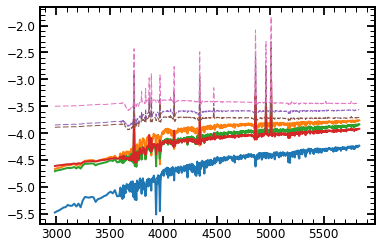

In [11]:
plt.plot(wave_IFU, np.log10(spec_bulge1_IFU), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_bulge2_IFU), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_bulge3_IFU), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_disk_IFU), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_clump1_IFU), '--', lw=1)
plt.plot(wave_IFU, np.log10(spec_clump2_IFU), '--', lw=1)
plt.plot(wave_IFU, np.log10(spec_clump3_IFU), '--', lw=1)
#plt.xlim([3, 5])
#plt.ylim([-6, -3])
plt.show()

In [12]:
# add noise to the spectra

# probably we want to have a wavelength dependent SNR (a la output of ETC)

snr = 10.0

snoise_sigma_bulge1 = spec_bulge1_IFU / snr
spec_bulge1_wn = spec_bulge1_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_bulge1
snoise_sigma_bulge2 = spec_bulge2_IFU / snr
spec_bulge2_wn = spec_bulge2_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_bulge2
snoise_sigma_bulge3 = spec_bulge3_IFU / snr
spec_bulge3_wn = spec_bulge3_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_bulge3

snoise_sigma_disk = spec_disk_IFU / snr
spec_disk_wn = spec_disk_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_disk

snoise_sigma_clump1 = spec_clump1_IFU / snr
spec_clump1_wn = spec_clump1_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_clump1
snoise_sigma_clump2 = spec_clump2_IFU / snr
spec_clump2_wn = spec_clump2_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_clump2
snoise_sigma_clump3 = spec_clump3_IFU / snr
spec_clump3_wn = spec_clump3_IFU + np.random.normal(0, 1.0, size=len(wave_IFU)) * snoise_sigma_clump3


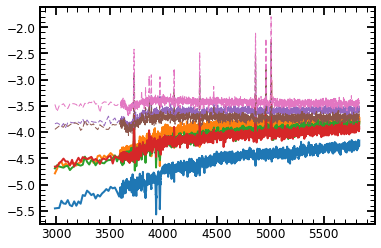

In [13]:
plt.plot(wave_IFU, np.log10(spec_bulge1_wn), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_bulge2_wn), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_bulge3_wn), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_disk_wn), '-', lw=2)
plt.plot(wave_IFU, np.log10(spec_clump1_wn), '--', lw=1)
plt.plot(wave_IFU, np.log10(spec_clump2_wn), '--', lw=1)
plt.plot(wave_IFU, np.log10(spec_clump3_wn), '--', lw=1)
plt.show()

In [14]:
# set up table and save it

table_spec = Table([wave_IFU, spec_bulge1_IFU, spec_bulge2_IFU, spec_bulge3_IFU, spec_disk_IFU, spec_clump1_IFU, spec_clump2_IFU, spec_clump3_IFU], names=('wavelength', 'spec_bulge1', 'spec_bulge2', 'spec_bulge3', 'spec_disk', 'spec_clump1', 'spec_clump2', 'spec_clump3'))
table_spec.write(path_spectra + 'example_spectra_without_noise.txt', format='ascii', overwrite=True)

table_spec = Table([wave_IFU, spec_bulge1_wn, snoise_sigma_bulge1, spec_bulge2_wn, snoise_sigma_bulge2, spec_bulge3_wn, snoise_sigma_bulge3, spec_disk_wn, snoise_sigma_disk, spec_clump1_wn, snoise_sigma_clump1, spec_clump2_wn, snoise_sigma_clump2, spec_clump3_wn, snoise_sigma_clump3], names=('wavelength', 'spec_bulge1', 'spec_bulge1_unc', 'spec_bulge2', 'spec_bulge2_unc', 'spec_bulge3', 'spec_bulge3_unc', 'spec_disk', 'spec_disk_unc', 'spec_clump1', 'spec_clump1_unc', 'spec_clump2', 'spec_clump2_unc', 'spec_clump3', 'spec_clump3_unc'))
table_spec.write(path_spectra + 'example_spectra_with_noise.txt', format='ascii', overwrite=True)

table_mags = Table([mag_bulge1, mag_bulge2, mag_bulge3, mag_disk, mag_clump1, mag_clump2, mag_clump3], names=('mags_bulge1', 'mags_bulge2', 'mags_bulge3', 'mags_disk', 'mags_clump1', 'mags_clump2', 'mags_clump3'))
table_mags.write(path_spectra + 'example_mags.txt', format='ascii', overwrite=True)



In [15]:
# how to read in python

from astropy.table import Table
table_spec = Table.read(path_spectra + 'example_spectra_with_noise.txt', format='ascii')
print table_spec
print table_spec.keys()

wavelength      spec_bulge1       ...    spec_clump3_unc    
---------- ---------------------- ... ----------------------
    2990.0 3.5226751955698207e-06 ... 3.1530912800809715e-05
    3010.0  3.566953994090143e-06 ... 3.1712096997359076e-05
    3030.0  3.596722959174888e-06 ... 3.1796381747381914e-05
    3050.0  4.930610383384077e-06 ...  3.183197283990637e-05
    3070.0 4.3743397823263824e-06 ...  3.187897308404197e-05
    3090.0  4.295271217004548e-06 ...   3.20277067341406e-05
    3110.0  5.069546899414431e-06 ...  3.204496537250981e-05
    3130.0 4.0655980734283935e-06 ...   3.20523902086493e-05
    3150.0  3.872247221642826e-06 ... 3.2218958523273105e-05
    3170.0  4.791416228384486e-06 ... 3.2300098210994275e-05
       ...                    ... ...                    ...
  5822.714   5.71447915107156e-05 ...  3.612387756949916e-05
 5823.6141  6.093048474331982e-05 ...  3.606092910939625e-05
 5824.5143  6.786303330156569e-05 ...  3.597313046366467e-05
 5825.4144  5.5767427183